## IMPORTAMOS LIBRERIAS

In [1]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## CARGAMOS LA BASE DE DATOS

In [2]:
# Cargar la base de datos LFW (Labeled Faces in the Wild)
lfw = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X, y = lfw.data, lfw.target

## PREPROCESAMIENTO DE LOS DATOS

In [3]:
# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## DEFINIMOS LOS MODELOS Y LOS HIPERPARAMETROS DE EVALUACIÓN

In [4]:
models_params = {
    'GaussianNB': (GaussianNB(), {}),
    'SGDClassifier': (SGDClassifier(), {'alpha': [0.0001, 0.001, 0.01], 'loss': ['hinge', 'log_loss']}),
    'LogisticRegression': (LogisticRegression(), {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}),
    'LinearDiscriminantAnalysis': (LinearDiscriminantAnalysis(), {'solver': ['svd', 'lsqr']}),
    'KNeighborsClassifier': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),
    'SVC': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'RandomForestClassifier': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    'GaussianProcessClassifier': (GaussianProcessClassifier(1.0 * RBF()), {'max_iter_predict': [50, 100]})
}

## DEFINIMOS LOS CRITERIOS DE EVALUACIÓN

In [5]:
# Definir los criterios de evaluación
scoring = {'accuracy': make_scorer(accuracy_score), 'f1': make_scorer(f1_score, average='weighted')}

## EVALUACIÓN CON VALIDACIÓN CRUZADA

In [6]:
# Evaluación con validación cruzada
results = {}

for name, (model, params) in models_params.items():
    grid_search = GridSearchCV(model, param_grid=params, scoring=scoring, refit='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    results[name] = {'best_params': grid_search.best_params_, 'best_score': grid_search.best_score_}

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## DEFINIMOS LOS RESULTADOS OBTENIDOS

In [7]:
# Mostrar los resultados
for model, res in results.items():
    print(f"Modelo: {model}")
    print(f"  Mejores Hiperparámetros: {res['best_params']}")
    print(f"  Mejor Score (Accuracy): {res['best_score']:.4f}\n")

Modelo: GaussianNB
  Mejores Hiperparámetros: {}
  Mejor Score (Accuracy): 0.3951

Modelo: SGDClassifier
  Mejores Hiperparámetros: {'alpha': 0.0001, 'loss': 'hinge'}
  Mejor Score (Accuracy): 0.7961

Modelo: LogisticRegression
  Mejores Hiperparámetros: {'C': 0.1, 'solver': 'lbfgs'}
  Mejor Score (Accuracy): 0.8398

Modelo: LinearDiscriminantAnalysis
  Mejores Hiperparámetros: {'solver': 'svd'}
  Mejor Score (Accuracy): 0.7194

Modelo: KNeighborsClassifier
  Mejores Hiperparámetros: {'n_neighbors': 5, 'weights': 'distance'}
  Mejor Score (Accuracy): 0.6087

Modelo: SVC
  Mejores Hiperparámetros: {'C': 0.1, 'kernel': 'linear'}
  Mejor Score (Accuracy): 0.8243

Modelo: RandomForestClassifier
  Mejores Hiperparámetros: {'max_depth': 20, 'n_estimators': 200}
  Mejor Score (Accuracy): 0.6175

Modelo: GaussianProcessClassifier
  Mejores Hiperparámetros: {'max_iter_predict': 50}
  Mejor Score (Accuracy): 0.1136



## umap vs pca

In [11]:
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


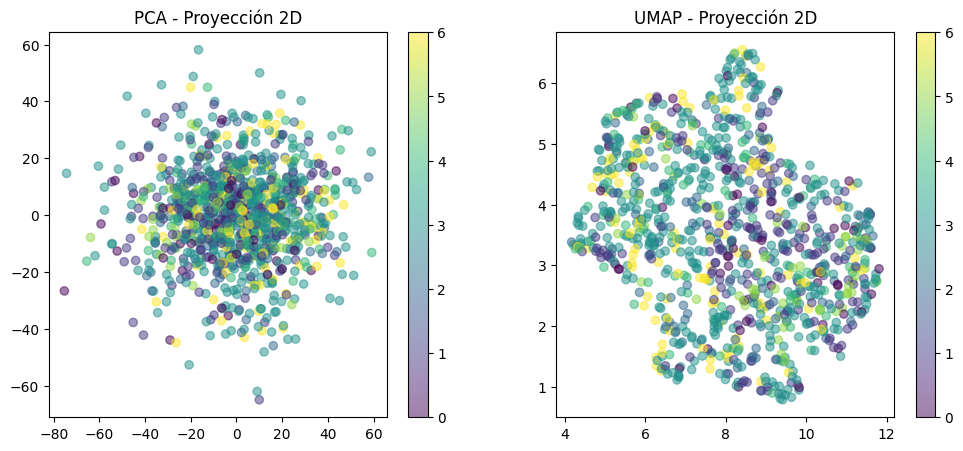

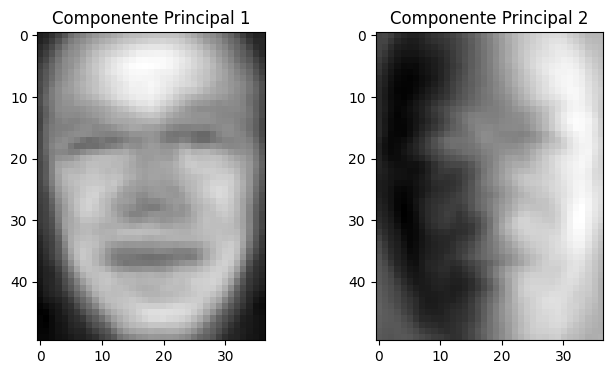

In [12]:
# Reducción de Dimensión y Visualización con PCA y UMAP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_train)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
scatter_pca = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
axes[0].set_title("PCA - Proyección 2D")
fig.colorbar(scatter_pca, ax=axes[0])

scatter_umap = axes[1].scatter(X_umap[:, 0], X_umap[:, 1], c=y_train, cmap='viridis', alpha=0.5)
axes[1].set_title("UMAP - Proyección 2D")
fig.colorbar(scatter_umap, ax=axes[1])

plt.show()

# Visualización de los primeros 2 componentes principales como imágenes
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i in range(2):
    axes[i].imshow(pca.components_[i].reshape(lfw.images.shape[1:]), cmap='gray')
    axes[i].set_title(f"Componente Principal {i+1}")
plt.show()
